In [1]:
from pysus.online_data.ESUS import download
import pandas as pd

# Downloading data from ESUS
This function alows for the download of COVID-19 data from ESUS.

In [6]:
df = download(uf='se')

In [7]:
df.head()

,dataNotificacao,dataInicioSintomas,dataTeste,estrangeiro,profissionalSaude,profissionalSeguranca,cbo,sexo,racaCor,estado,...,tipoTesteSorologico,resultadoTesteSorologicoIgA,resultadoTesteSorologicoIgG,resultadoTesteSorologicoIgM,resultadoTesteSorologicoTotais,@timestamp,estadoIBGE,estadoNotificacaoIBGE,municipioIBGE,municipioNotificacaoIBGE
0,2020-07-04T14:37:16.521Z,2020-06-30T03:00:00.000Z,2020-07-03T03:00:00.000Z,None,Não,Não,None,Feminino,Branca,SERGIPE,...,None,None,None,None,None,2021-03-02T20:10:19.244Z,28,28,2800308,2800308
1,2020-07-03T03:00:00.000Z,2020-06-25T03:00:00.000Z,2020-07-03T03:00:00.000Z,Não,Sim,Não,3222 - Técnico ou Auxiliar em Enfermagem,Feminino,Parda,SERGIPE,...,None,None,None,None,None,2021-03-02T20:10:19.244Z,28,28,2800308,2806701
2,2020-07-04T14:40:48.582Z,2020-06-26T03:00:00.000Z,2020-07-03T03:00:00.000Z,None,Sim,Não,251605 - Assistente Social,Feminino,Parda,SERGIPE,...,None,None,None,None,None,2021-03-02T20:10:19.244Z,28,28,2800308,2800308
3,2020-07-04T14:45:52.616Z,2020-07-03T03:00:00.000Z,2020-07-03T03:00:00.000Z,None,Sim,Não,2232 - Cirurgião-Dentista,Feminino,Parda,SERGIPE,...,None,None,None,None,None,2021-03-02T20:10:19.244Z,28,28,2800308,2800308
4,2020-07-04T14:47:55.651Z,2020-06-16T03:00:00.000Z,2020-06-04T03:00:00.000Z,None,Não,Não,None,Masculino,Parda,SERGIPE,...,None,None,None,None,None,2021-03-02T20:10:19.244Z,28,28,2800308,2800308


Now we will create a datetime index for our dataframe, but we must be carefull with missing dates here. For now, to enable a quick visualization, we will simply coerce missing dates to `NaT`.

In [8]:
df['datesint'] = pd.to_datetime(df['dataInicioSintomas'],errors='coerce')
# df = df.dropna()
df.set_index('datesint', inplace=True);

Now we can count the cases per day and plot.

In [9]:
df_day = df.resample('D').count()
df_day.head()

,dataNotificacao,dataInicioSintomas,dataTeste,estrangeiro,profissionalSaude,profissionalSeguranca,cbo,sexo,racaCor,estado,...,tipoTesteSorologico,resultadoTesteSorologicoIgA,resultadoTesteSorologicoIgG,resultadoTesteSorologicoIgM,resultadoTesteSorologicoTotais,@timestamp,estadoIBGE,estadoNotificacaoIBGE,municipioIBGE,municipioNotificacaoIBGE
datesint,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00+00:00,17,17,9,7,17,16,2,17,17,17,...,2,0,1,1,0,17,17,17,17,17
2020-01-02 00:00:00+00:00,16,16,10,1,16,16,1,16,16,16,...,1,0,1,1,0,16,16,16,16,16
2020-01-03 00:00:00+00:00,15,15,9,2,15,15,2,15,15,15,...,0,0,0,0,0,15,15,15,15,15
2020-01-04 00:00:00+00:00,19,19,13,0,19,19,1,19,18,19,...,0,0,0,0,0,19,19,19,19,19
2020-01-05 00:00:00+00:00,4,4,1,0,4,4,0,4,4,4,...,1,0,1,1,0,4,4,4,4,4


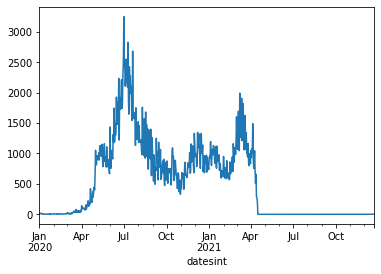

In [11]:
df_day.estadoIBGE.plot();